In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_pose = mp.solutions.pose # Mediapipe Solutions

![image](/home/janek/Documents/ml_sports/data/body_keys.png "title")

In [3]:
# cap = cv2.VideoCapture(0)
# # Initiate holistic model
    
# while cap.isOpened():
#     ret, frame = cap.read()

#     cv2.imshow('Raw Webcam Feed', frame)

#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [4]:
# cap = cv2.VideoCapture(0)
# # Initiate holistic model
# with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
#     while cap.isOpened():
#         ret, frame = cap.read()

#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image.flags.writeable = False        
#         results = pose.process(image)
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
#                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                     )

#         cv2.imshow('Raw Webcam Feed', image)

#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()

In [5]:
import math
import numpy as np

In [25]:
# cap = cv2.VideoCapture("/home/janek/Documents/ml_sports/data/seba.mp4")  
cap = cv2.VideoCapture("/home/janek/Documents/ml_sports/data/6_wioslowanie_sztanga.mp4")  

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

kierunek = "down"
zmiana_kierunku = []
all_distance = []
long_serie = 50
cnt_series = 0

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    frame_counter = 0
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        results = pose.process(image)
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            distance_list = []
            for lndmrk in mp_pose.PoseLandmark:
                for next in mp_pose.PoseLandmark:
                    point = landmarks[lndmrk.value]
                    next = landmarks[next.value]
                    distance_list.append(math.dist([point.x, point.y], [next.x, next.y]))
            sum_distance = int(sum(distance_list))
            # print(sum_distance)
            all_distance.append(sum_distance)
            if len(zmiana_kierunku) == 0:
                zmiana_kierunku.append((all_distance[0],0))
            idx = -1
            if kierunek == "down" and all_distance[idx] > all_distance[idx-1] and abs(all_distance[idx] - zmiana_kierunku[-1][0]) > long_serie:
                # print("|---- zmiana")
                zmiana_kierunku.append((all_distance[idx-1],idx-1))
                kierunek = "up"
            if kierunek == "up" and all_distance[idx] < all_distance[idx-1] and abs(all_distance[idx] - zmiana_kierunku[-1][0]) > long_serie:
                # print("|---- zmiana")
                zmiana_kierunku.append((all_distance[idx-1],idx-1))
                kierunek = "down"
                cnt_series = cnt_series+1
                print(cnt_series)


        except:
            pass


        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (100,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(cnt_series), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
    


        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

        # If you have something like this
        # matplotlib.pyplot.plot(x_values, y_values, color='yellow')
        # And if you need to plot more curves just add them as an element to the array of polygonal curves
        last_reps = 100
        x1 = np.array(list(range(len(all_distance[-last_reps:])))) 
        y1 = np.array(all_distance[-last_reps:]) 
        curve1 = np.column_stack((x1.astype(np.int32), y1.astype(np.int32)))
        cv2.polylines(image, [curve1], False, (0,255,255), 2)
    
    
        #### video on the loop
        frame_counter += 1
        #If the last frame is reached, reset the capture and the frame_counter
        if frame_counter == cap.get(cv2.CAP_PROP_FRAME_COUNT):
            frame_counter = 0 #Or whatever as long as it is the same as next line
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

        cv2.imshow('Raw Webcam Feed', image)
        # cv2.waitKey(int((1/30) * 1000)) # slow motion

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [7]:
min(all_distance), max(all_distance)

(233, 342)

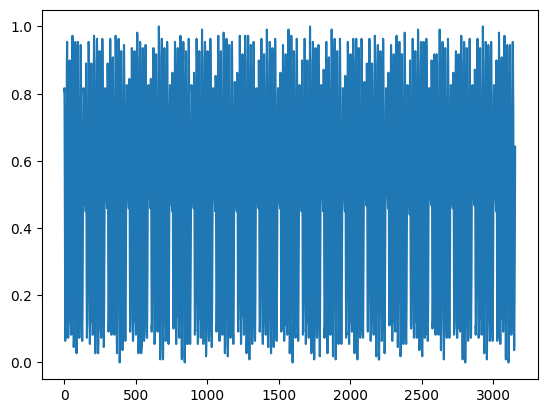

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


plt.plot(NormalizeData(all_distance))
plt.show()

In [9]:
316.7977146930677 - 240.616926267092

76.18078842597569

322
316
297
272
260
253
240
244
|---- zmiana
241
245
252
256
267
288
303
307
321
330
335
337
330
|---- zmiana
323
315
269
258
246
241
241
242
|---- zmiana
248
253
260
278
296
312
324
330
331
327
|---- zmiana
320
313
298
271
258
246
247
|---- zmiana
244
244
242
247
250
261
275
308
324
333
339
337
|---- zmiana
332
320
312
285
265
252
241
238
239
|---- zmiana
240
248
259
268
286
300
316
329
331
337
336
|---- zmiana
334
323
312
289
264
243
237
236
238
|---- zmiana
244
246
258
277
294
311
326
335
337
334
|---- zmiana
328
319
303
274
260
254
243
241
241
242
|---- zmiana
246
249
261
275
290
306
330
336
335
|---- zmiana
328
318
313
288
269
256
246
244
240
240
245
|---- zmiana
250
261
275
287
300
310
320
322
321
|---- zmiana
320
319
313
308
301
294
290
286
287
285
285
284
284
282
311
330
322
307
278
263
251
241
243
|---- zmiana
245
247
254
259
273
290
302
306
318
328
337
336
|---- zmiana
332
324
313
273
260
245
241
239
241
|---- zmiana
249
251
262
279
299
314
325
329
330
329
|---- zmiana
321
31

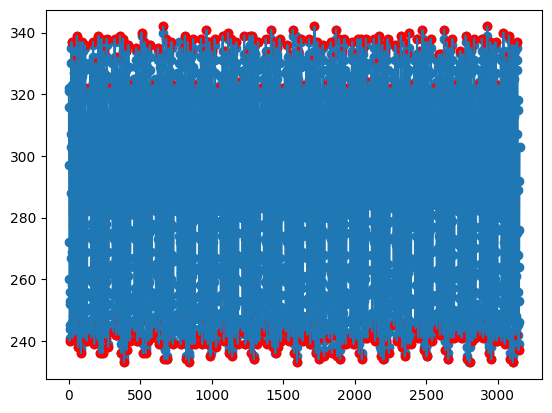

In [10]:
kierunek = "down"
zmiana_kierunku = [(all_distance[0],0)]
long_serie = 75
for idx in range(1,len(all_distance)):
    print(all_distance[idx])
    if kierunek == "down" and all_distance[idx] > all_distance[idx-1] and abs(all_distance[idx] - zmiana_kierunku[-1][0]) > long_serie:
        print("|---- zmiana")
        zmiana_kierunku.append((all_distance[idx-1],idx-1))
        kierunek = "up"
    if kierunek == "up" and all_distance[idx] < all_distance[idx-1] and abs(all_distance[idx] - zmiana_kierunku[-1][0]) > long_serie:
        print("|---- zmiana")
        zmiana_kierunku.append((all_distance[idx-1],idx-1))
        kierunek = "down"

plt.plot(all_distance)
plt.scatter([x for x in range(len(all_distance))],[y for y in all_distance])
plt.scatter([y for x,y in zmiana_kierunku[1:]], [x for x,y in zmiana_kierunku[1:]],c="red")
plt.show()


In [11]:
# dynamiczne obliczanie dlugości ćwiczenia na podstawie pierwszego powtórzenia 
# dynamiczne rozkmnineie down / top na pierwszego powtórzenia 
# sprawdzenie innego ćwiczenia :) 